#### Let's look at the volumes of regions where we are outside the uncertainty bounds of Farinotti et al. (2019)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = []
for i in range(273):
    cols.append(i)

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')

In [3]:
df = df.dropna(subset = 'FMT')

In [4]:
important_regions = ['05','06','08','09','19']

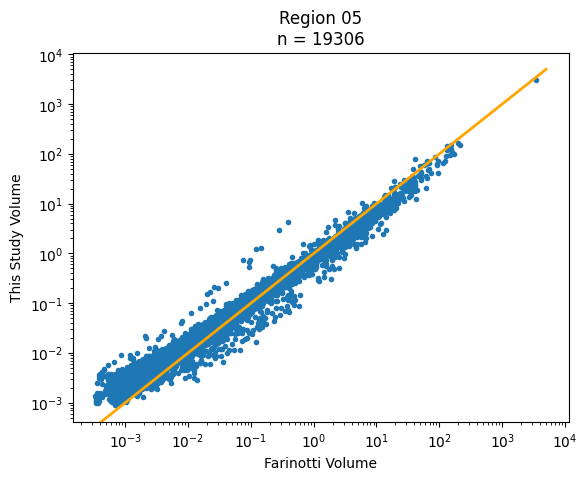

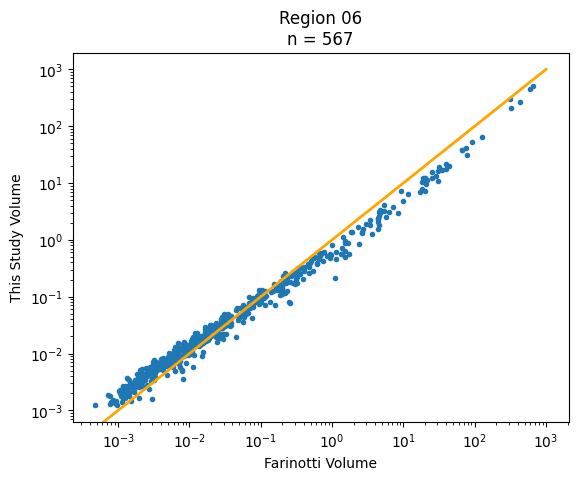

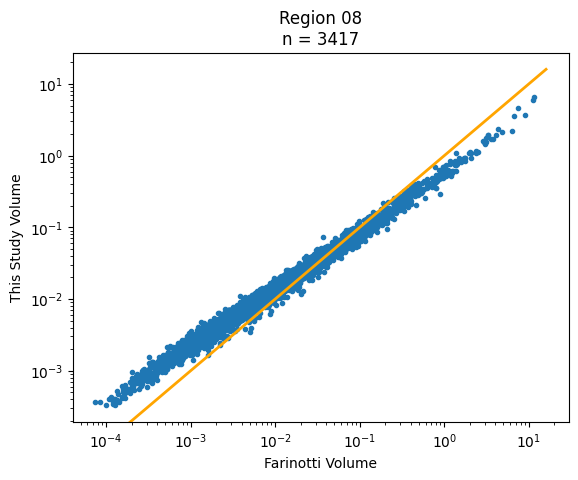

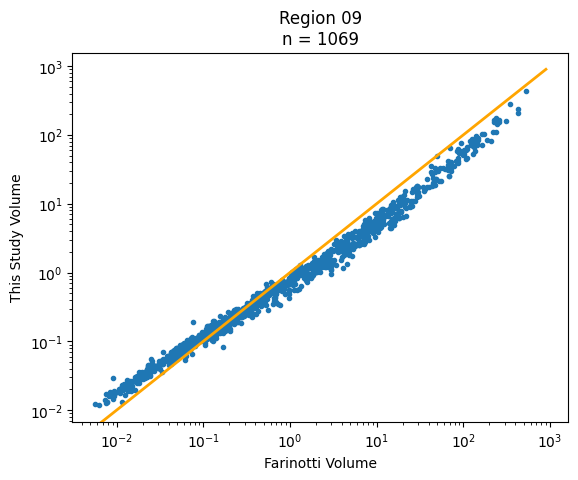

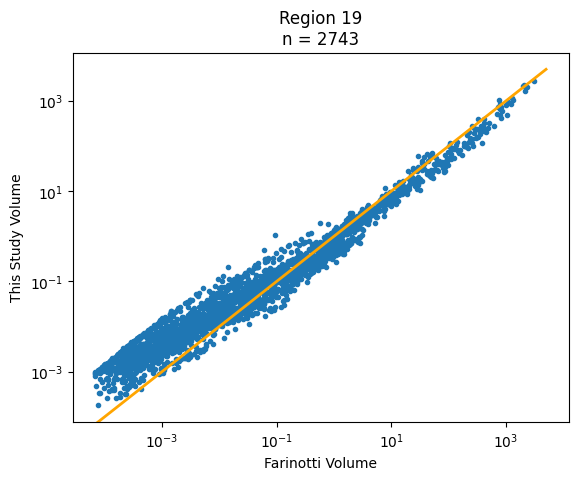

In [5]:
for reg in important_regions:
    
    dft = df[df['region'] == reg]

    x = dft['FMT'] / 1e3 * dft['Area']
    y = np.mean(dft[cols], axis = 1) * dft['Area']
#     xy = np.vstack([np.log10(x),np.log10(y)])
#     print('calculating density')
#     z = gaussian_kde(xy)(xy)
    plt.scatter(x,y,marker = '.')
    plt.xscale('log')
    plt.xlabel('Farinotti Volume')
    plt.yscale('log')
    plt.ylabel('This Study Volume')
    plt.title('Region ' + reg + f'\nn = {len(dft)}')
#     plt.show()
    if reg == '05':
        plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
    if reg == '06':
        plt.plot((0,1000),(0,1000),c = 'orange',linewidth = 2)
    if reg == '08':
        plt.plot((0,16),(0,16),c = 'orange',linewidth = 2)
    if reg == '09':
        plt.plot((0,900),(0,900),c = 'orange',linewidth = 2)
    if reg == '19':
        plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
    plt.show()

#### That doesn't feel super helpful. Let's look at some "residuals" with Farinotti

In [6]:
y = np.mean(df[cols],axis = 1) * df['Area']
x = df['FMT']/1e3 * df['Area']

In [7]:
df = pd.concat([df,pd.Series(y-x,name = 'r')],axis = 1)

In [8]:
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Area_unc_270,Area_unc_271,Area_unc_272,var_eps_H,var_eps_R,var_eps_M,var_H,var_A,sig_k_ind,r
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,...,0.312,0.298,0.336,0.000010,0.000011,0.000006,0.000028,0.003275,4.502744e-06,-0.001465
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.6680,63.4040,1,2,0.558,1713,...,0.483,0.462,0.521,0.000006,0.000037,0.000032,0.000075,0.006049,3.532851e-05,0.007802
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.0800,63.3760,1,2,1.685,1609,...,1.459,1.395,1.572,0.000006,0.000035,0.000030,0.000072,0.028419,2.553411e-04,0.016780
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.1200,63.3810,1,2,3.681,1273,...,3.188,3.048,3.434,0.000005,0.000040,0.000036,0.000082,0.084864,1.298571e-03,0.003962
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.0570,63.5510,1,2,2.573,1494,...,2.228,2.131,2.401,0.000005,0.000042,0.000039,0.000086,0.051403,6.969922e-04,0.014419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,G322268E53986S,20020502,-9999999,-37.7325,-53.9860,19,3,0.042,310,...,0.036,0.035,0.039,0.000010,0.000030,0.000024,0.000064,0.000162,3.347028e-07,0.000991
216497,RGI60-19.02749,G323864E54831S,20030207,-9999999,-36.1361,-54.8310,19,3,0.567,330,...,0.491,0.469,0.529,0.000016,0.000041,0.000037,0.000094,0.006186,4.454661e-05,0.015111
216498,RGI60-19.02750,G322698E54188S,20030207,-9999999,-37.3018,-54.1884,19,3,4.118,10,...,3.566,3.410,3.842,0.000008,0.000075,0.000082,0.000165,0.099296,3.408307e-03,0.089569
216499,RGI60-19.02751,G269573E68866S,19870101,-9999999,-90.4266,-68.8656,19,1,0.011,170,...,0.010,0.009,0.010,0.000022,0.000100,0.000121,0.000243,0.000025,2.779720e-07,0.000976


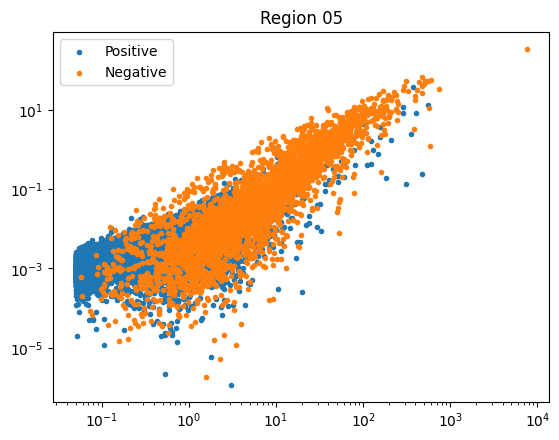

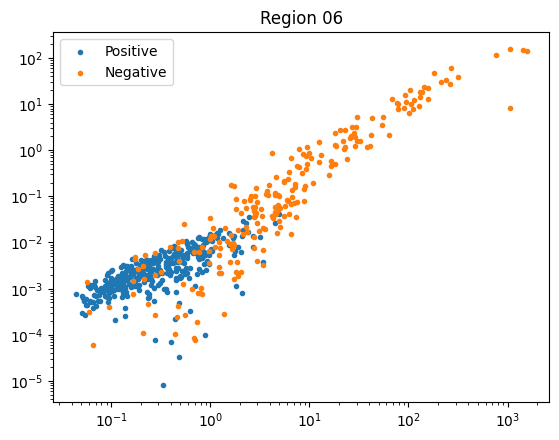

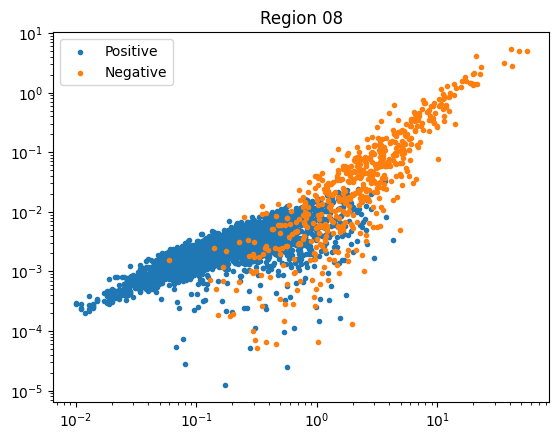

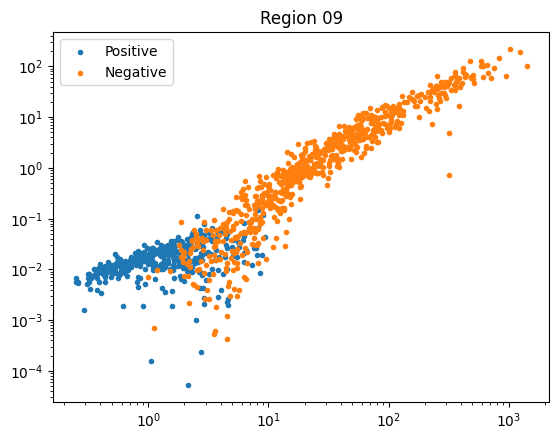

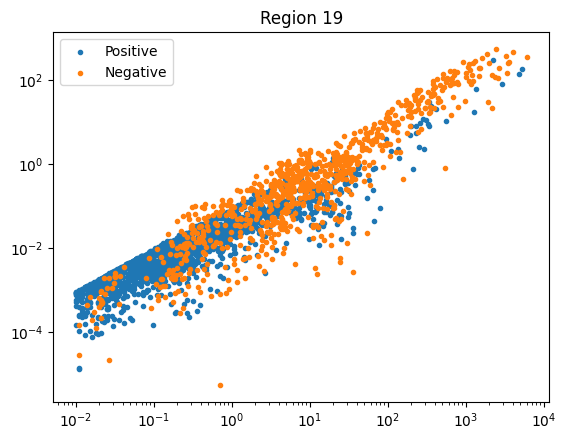

In [9]:
for reg in important_regions:
    
    dft = df[df['region'] == reg]
    dft = dft.dropna(subset = 'r')
    if dft.empty:
        continue
    else:
        x = dft['Area']
        y = dft['r']

#         print('calculating density')
#         z = gaussian_kde(xy)(xy)
        plt.scatter(x,y,marker = '.',label = 'Positive')
        plt.scatter(x,-y,marker = '.',label = 'Negative')
        plt.xscale('log')
        plt.yscale('log')
#         plt.ylim(y.min(),y.max())
        plt.title('Region ' + reg)
        plt.legend()
        plt.show()